# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import diptest

from scipy import stats
from statsmodels.stats.diagnostic import lilliefors
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# Load CSV and Data Observation

In [2]:
df = pd.read_csv('take_home_task_dataset.csv')
df.head()

,posting_date,volume_gbp
0,2023-04-01,0.00
1,2023-04-02,170487.18
2,2023-04-03,250508.04
3,2023-04-04,611955.31
4,2023-04-05,282503.79


In [3]:
df.describe()

,volume_gbp
count,2.530000e+02
mean,1.884907e+05
std,1.695782e+05
min,0.000000e+00
25%,7.220960e+03
50%,1.704872e+05
75%,2.784512e+05
max,1.057541e+06


In [ ]:
# Checking data over time
fig = px.line(df, x='posting_date', y='volume_gbp', title='Daily Transfer Volumes from GBP to ZAR')
fig.show()

# Question 1 
### Analyse the Distribution of Daily Transfer Volumes

In [5]:
fig = px.histogram(df, x='volume_gbp', nbins=50, title='Distribution of Daily Transfer Volumes')
fig.update_layout(
    xaxis_title="Volume (GBP)",
    yaxis_title="Frequency"
)
fig.show()

In [6]:
# Shapiro-Wilk test for normal distribution
shapiro_test = stats.shapiro(df['volume_gbp'])
print(f'Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')


Shapiro-Wilk Test: Statistic=0.8982142931546226, p-value=4.815383136838701e-12


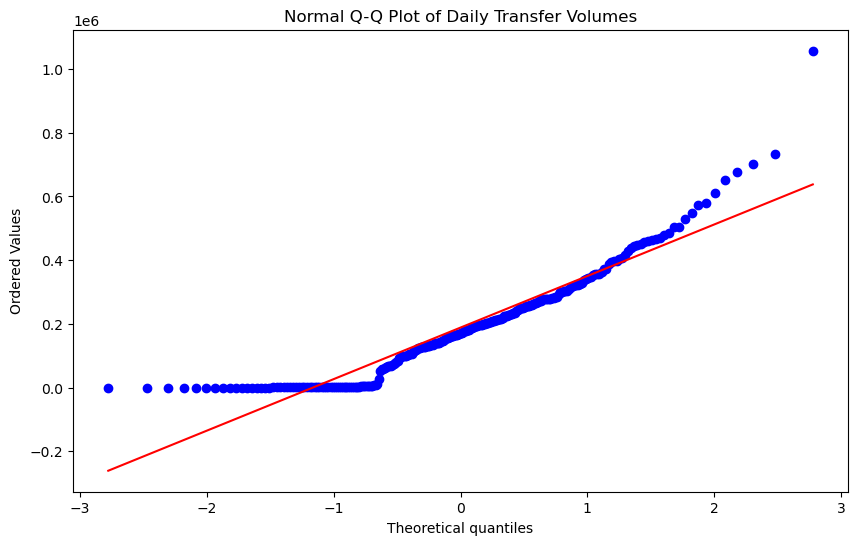

In [7]:
# Plot Q-Q plot to visually inspect normal distribution
plt.figure(figsize=(10, 6))
stats.probplot(df['volume_gbp'], dist="norm", plot=plt)
plt.title('Normal Q-Q Plot of Daily Transfer Volumes')
plt.show()

In [8]:
# Liliefors test for exponential distribution
lilliefors_test_stat, lilliefors_p_value = lilliefors(df['volume_gbp'], dist='exp')
print(f'Liliefors Test: Statistic={lilliefors_test_stat}, p-value={lilliefors_p_value}')

Liliefors Test: Statistic=0.2157179540209486, p-value=0.0009999999999998899


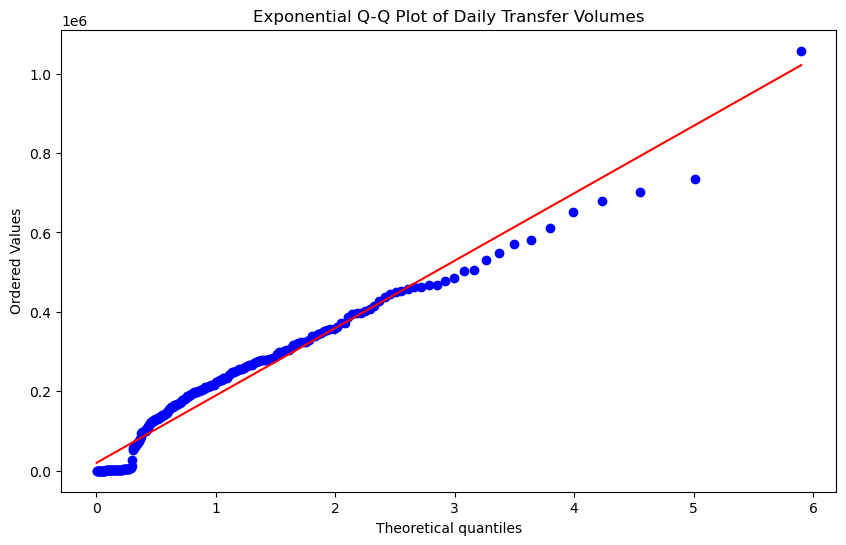

In [9]:
# Plot Q-Q plot to visually inspect exponential distribution
plt.figure(figsize=(10, 6))
stats.probplot(df['volume_gbp'], dist="expon", plot=plt)
plt.title('Exponential Q-Q Plot of Daily Transfer Volumes')
plt.show()

In [10]:
# Hartigan's Dip test for multimodality
dip_statistic, p_value = diptest.diptest(df['volume_gbp'])
print(f"Hartigan's Dip Test: Statistic={dip_statistic}, p-value={p_value}")

Hartigan's Dip Test: Statistic=0.05315971092446788, p-value=1.9209043518930713e-05


In [11]:
# Removing smallest and largest bins
df_high_value = df[(df['volume_gbp'] > 10000) & (df['volume_gbp'] < 1000000)]
fig = px.histogram(df_high_value, x='volume_gbp', nbins=50, title='Distribution of Daily Transfer Volumes')
fig.update_layout(
    xaxis_title="Volume (GBP)",
    yaxis_title="Frequency"
)
fig.show()
# Shapiro-Wilk test for normal distribution
shapiro_test = stats.shapiro(df_high_value['volume_gbp'])
print(f'Shapiro-Wilk Test (Normal): Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')
# Liliefors test for exponential distribution
lilliefors_test_stat, lilliefors_p_value = lilliefors(df_high_value['volume_gbp'], dist='exp')
print(f'Liliefors Test (Exponential): Statistic={lilliefors_test_stat}, p-value={lilliefors_p_value}')
# Kolmogorov-Smirnov Test for gamma distribution 
gamma_params_high = stats.gamma.fit(df_high_value['volume_gbp'])
ks_statistic, p_value = stats.kstest(df_high_value['volume_gbp'], 'gamma', args=gamma_params_high)
print(f"Kolmogorov-Smirnov Test (Gamma): Statistic={ks_statistic:.4f}, p-value={p_value:.4f}")


Shapiro-Wilk Test (Normal): Statistic=0.9297573694187142, p-value=6.998149226166598e-08
Liliefors Test (Exponential): Statistic=0.23955013846769585, p-value=0.0009999999999998899
Kolmogorov-Smirnov Test (Gamma): Statistic=0.0374, p-value=0.9464


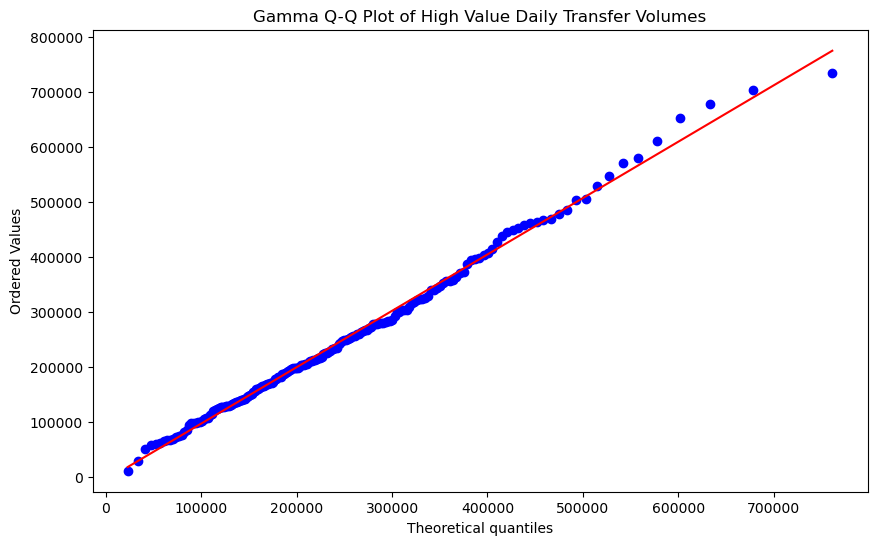

In [14]:
# Plot Q-Q plot to visually inspect gamma distribution
plt.figure(figsize=(10, 6))
stats.probplot(df_high_value['volume_gbp'], dist="gamma", sparams=gamma_params_high, plot=plt)
plt.title('Gamma Q-Q Plot of High Value Daily Transfer Volumes')
plt.show()

In [ ]:
# Checking lowest bin's distribution
df_low_value = df[(df['volume_gbp'] < 10000) & (df['volume_gbp'] > 0)]

fig = px.histogram(df_low_value, x='volume_gbp', nbins=20, title='Distribution of Daily Transfer Volumes')
fig.update_layout(
    xaxis_title="Volume (GBP)",
    yaxis_title="Frequency"
)
fig.show()
# Shapiro-Wilk test for normal distribution
shapiro_test = stats.shapiro(df_low_value['volume_gbp'])
print(f'Shapiro-Wilk Test (Normal): Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')
# Liliefors test for exponential distribution
lilliefors_test_stat, lilliefors_p_value = lilliefors(df_low_value['volume_gbp'], dist='exp')
print(f'Liliefors Test (Exponential): Statistic={lilliefors_test_stat}, p-value={lilliefors_p_value}')
# Kolmogorov-Smirnov Test for gamma distribution 
gamma_params_low = stats.gamma.fit(df_low_value['volume_gbp'])
ks_statistic, p_value = stats.kstest(df_low_value['volume_gbp'], 'gamma', args=gamma_params_low)
print(f"Kolmogorov-Smirnov Test (Gamma): Statistic={ks_statistic:.4f}, p-value={p_value:.4f}")

Shapiro-Wilk Test (Normal): Statistic=0.898055851619518, p-value=0.0002431189525246616
Liliefors Test (Exponential): Statistic=0.11551174228834782, p-value=0.23585134714768347
Kolmogorov-Smirnov Test (Gamma): Statistic=0.1242, p-value=0.3467


# Question 1a

The observed distribution of daily transfer volumes from GBP to ZAR is clearly not unimodal as the low p-value of the Hartigan's Dip test and the poor fit to common unimodal distributions shows.

Looking at the results of both the normal and exponential Q-Q plot it seems that there is a distinct group of lower transfer volume dats that do not fit with the respective distributions

Therefore, I decided to remove all the days that had less than £10,000 worth of transfer volume as well as the one obvious outlier day where transfer volumes exceeded £1,000,000. The distribution that fits this high volume segment the best is certainly the gamma distribution as the failure to reject the null hypothesis for the Kolmogorov-Smirnov test shows.

When it comes to the low volume segment (days with less than £10,000 transfer volume) if the days with 0 transfer volume are removed then we get high p values for both Liliefors and Kolmogorov-Smirnov test. This indicates that the data can fit either an exponential or gamma distribution which is possible due to the 2 distributions being closely associated. Since the p-value for the Kolmogorov-Smirnov is higher we can also assume that the low volume segment follow a gamma distribution.

# Question 1b
1. **Weekly fluctuations**: Each week there is a spike in transfers during the middle of the week and not a lot of transfers happen during the weekend, dropping well below £10k sometimes even getting to 0 on a Saturday or Sunday. This could be a very clear cause of the bimodality shown in the data.

2. **October data missing**: A large chunk of the data for October is not present which further skews the data to the right due to the large number of days with volume equal to 0. This I believe is not actually the case but rather the data is simply not present for the sake of the case study since question 3 requires to estimate the transfer volume for this month.

3. **Remittance influence**: The daily transfer volumes from GBP to ZAR are probably affected by remittances especially for a company like Wise. Therefore this will inevitably skew the data towards small and frequent transfers rather than large one that might instead be due to institutional money exchanges.

# Question 1c
The main consequence of working with any bimodal and non normal distribution is that tests that assume normality (e.g. t-tests, ANOVA, etc.) will perform poorly since two core assumptions are violated.

This could lead to incorrect conclusions and would therefore require the use of different tests which do not use these assumptions such as the Mann-Whitney U test which is not affected by outliers as it uses the median instead of the mean.

Alternatively the data should be transformed so that it fits a normal distribution or at least it approximates it better. This could be as simple as taking the natural log of the daily transfer volumes although this would make it more complex and less intuitive to comprehend the results of the analysis, especially for a non-technical audience.

Moreover, when working with bimodal data usually it would be beneficial to analyse each population separately. However, since the transfer volume data is a time series, arbitrarily removing values doesn’t seem like the best approach for modelling. Instead, due to the clear weekly pattern that the data exhibits, any kind of forecasting should take this into consideration.

# Question 2
### Quarterly Transfer Volume Analysis

In [17]:
# Doing quarterly aggregation
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['quarter'] = df['posting_date'].dt.to_period('Q')
quarterly_volumes = df.groupby('quarter')['volume_gbp'].sum().reset_index()
quarterly_volumes['quarter'] = quarterly_volumes['quarter'].astype(str)
quarterly_volumes['volume_text'] = quarterly_volumes['volume_gbp'].apply(lambda x: f'{x:,.0f}')

# Plotting the quarterly transfer volumes
fig = px.bar(quarterly_volumes, x='quarter', y='volume_gbp', text = 'volume_text', title='Quarterly Transfer Volumes')
fig.show()

### First impression
Looking at the overall values it seems that there is a consistent decline in quarterly transfer volumes. However, there are 2 important caveats:

1. Quarterly data for Q4 is incomplete due to the October data missing hence the real value of Q4 should probably be higher
2. We know there are large outliers that could have a big impact on the overall volume but less so when looking at a mean or median

Therefore, doing a test to check if the differences in the means or medians of the various quarters are statistically different is in order.

In [18]:
# Perform a ANOVA  to determine if the differences in quarterly transfer volumes is significant
anova_result = stats.f_oneway(
    df[df['quarter'] == '2023Q2']['volume_gbp'],
    df[df['quarter'] == '2023Q3']['volume_gbp'],
    df[df['quarter'] == '2023Q4']['volume_gbp']
)

print(f'ANOVA Test: F-statistic={anova_result.statistic}, p-value={anova_result.pvalue}')

ANOVA Test: F-statistic=0.9667705170221126, p-value=0.3817264213239653


In [19]:
# Perform Kruskal-Wallis test to check for significant differences between quarters
kruskal_result = stats.kruskal(
    df[df['quarter'] == '2023Q2']['volume_gbp'],
    df[df['quarter'] == '2023Q3']['volume_gbp'],
    df[df['quarter'] == '2023Q4']['volume_gbp']
)

print(f'Kruskal-Wallis Test: H-statistic={kruskal_result.statistic}, p-value={kruskal_result.pvalue}')

Kruskal-Wallis Test: H-statistic=0.0729603495389541, p-value=0.9641772087422735


### Interpretation of ANOVA and Kruskal-Wallis Results

We can use the ANOVA test to determine if the means of transfer volumes across different quarters are statistically significant differences. The null hypothesis (H0) is that there are no differences in the means across quarters.

Based on the ANOVA p-value, we can determine that the observed differences in the means of quarterly transfer volumes is NOT statistically significant, hence the differences could be considered as the result of background fluctuations.

However, due to the non-normality of the distribution and the existence of large outliers it might be beneficial to also do a test that does not assume that the underlying data follows a normal distribution

Hence, we can use the Kruskal-Wallis test which is an alternative to the type of ANOVA test we just employed that however tests the median of different quarters rather than the mean. Once again the null hypothesis assumes that all groups originate from the same population (i.e., have equal medians).

Based on the Kruskal-Wallis p values we can determine that the observed differences in the medians of quarterly transfer volumes is NOT statistically significant, hence this points even more strongly at the differences being the result of background fluctuations.


# Question 3
### Estimate Total Transfer Volume for October 2023

In [20]:
# Any data after 30th of September is considered as future data and should not be used for forecasting.
pre_october_data = df[df['posting_date'] < '2023-10-01']
pre_october_data['cap'] = 1000000 #Setting a cap to be able to use the logistic growth model

# Using Facebook Prophet for forecasting
# Data preparation
df_prophet = pre_october_data.reset_index().rename(columns={'posting_date': 'ds', 'volume_gbp': 'y'})

# Fitting model model
model = Prophet(growth='logistic', weekly_seasonality=True)
model.fit(df_prophet)

# Forecasting October
future = model.make_future_dataframe(periods=31)  # 31 days in October
future['cap'] = 1000000 #Setting a cap to be able to use the logistic growth model
forecast = model.predict(future)
october_forecast = forecast.tail(31)['yhat'].sum()
print(f"Prophet Forecast: £{october_forecast:,.2f}")

/var/folders/cj/mjyzb9257zv77l3r38yxnslw0000gn/T/ipykernel_98054/3499043265.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

04:52:34 - cmdstanpy - INFO - Chain [1] start processing
04:52:34 - cmdstanpy - INFO - Chain [1] done processing


Prophet Forecast: £6,195,745.41


In [21]:
# Plotting daily forecast and confidence intervals
plot_plotly(model, forecast)

### Assumptions
To estimate the total transfer volume for October I decided that this should be treated as a true forecasting exercise, therefore any data after the 30th of September should not be taken into consideration. Moreover, due to the strong seasonality present in the data, I decided to forecast each day independently and only aggregate the results at the end to hopefully provide more accurate data.

### Methodology
To create the forecast I decided to implement prophet, an open source forecasting tool developed by facebook which is intended for forecasting univariate time series data with strong seasonal effects, which is precisely the kind of data in this case study. The two main changes I made to the base model were to use logistic growth model to avoid having any forecast below £0 and to explicitly state that there is a weekly seasonality,

### Results
The results show that the estimated total transfer volume for October is £6,195,745.41 which is not too far away for the amounts seen in the following months and could therefore be used instead of the patchy October data that was provided. The image above also shows the confidence interval for each day together with the forecast providing additional insight.